### The blood transfusion dataset

[Original author](https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_blood_transfusion.html)  
Under a CC-BY License by Inria Learning Lab, scikit-learn @ La Fondation Inria, Inria Academy.

In this notebook, we will present the “blood transfusion” dataset.  We start by loading the entire dataset.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving blood_transfusion.csv to blood_transfusion.csv


In [3]:
import pandas as pd
blood_transfusion = pd.read_csv('blood_transfusion.csv')

We can have a first look at the at the dataset loaded.

In [32]:
blood_transfusion.head()

,Recency,Frequency,Monetary,Time,Class
0,2,50,12500,98,donated
1,0,13,3250,28,donated
2,1,16,4000,35,donated
3,2,20,5000,45,donated
4,1,24,6000,77,not donated


In this dataframe, we can see that the last column correspond to the target to be predicted called "Class". We will create two variables, data and target to separate the data from which we could learn a predictive model and the target that should be predicted.

In [33]:
data = blood_transfusion.drop(columns="Class")
target = blood_transfusion["Class"]

Let’s have a first look at the data variable.

In [6]:
data.head()

,Recency,Frequency,Monetary,Time
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77


We observe four columns. Each record corresponds to a person that intended to give blood. The information stored in each column are:

- Recency: the time in months since the last time a person intended to give blood;  
- Frequency: the number of time a person intended to give blood in the past;  
- Monetary: the amount of blood given in the past (in c.c.);  
- Time: the time in months since the first time a person intended to give blood.  

Now, let’s have a look regarding the type of data that we are dealing in these columns and if any missing values are present in our dataset.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    748 non-null    int64
 1   Frequency  748 non-null    int64
 2   Monetary   748 non-null    int64
 3   Time       748 non-null    int64
dtypes: int64(4)
memory usage: 23.5 KB


Our dataset is made of 748 samples. All features are represented with integer numbers and there is no missing values. We can have a look at each feature distributions.

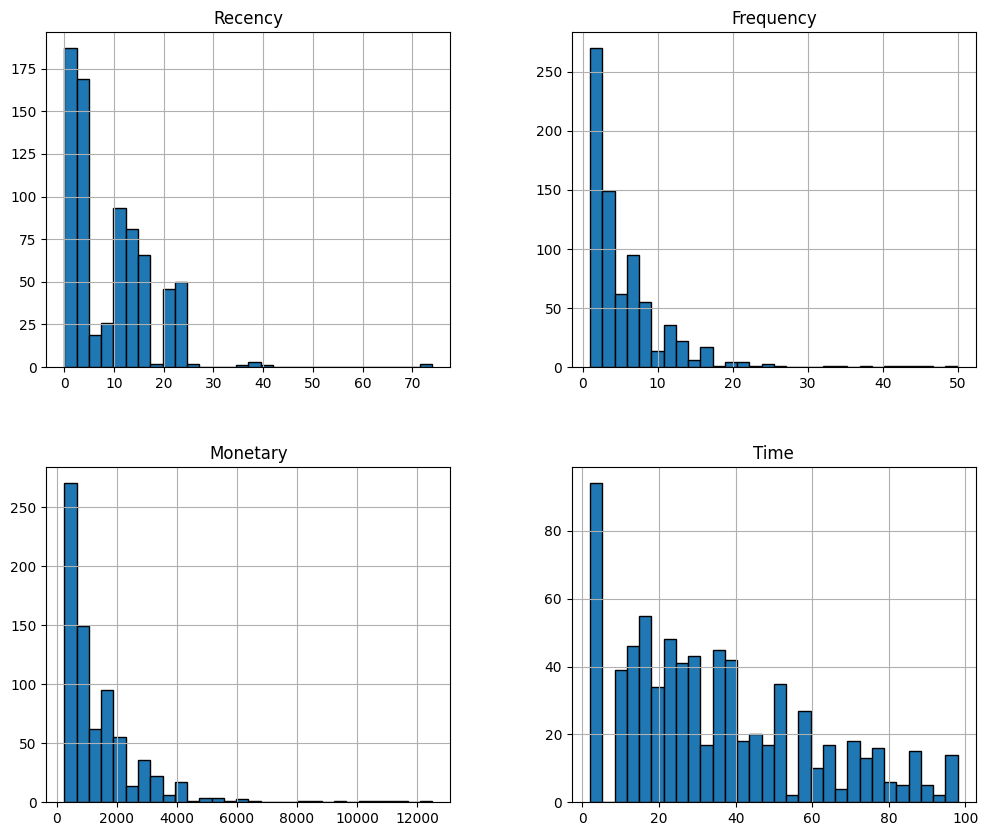

In [8]:
_ = data.hist(figsize=(12, 10), bins=30, edgecolor="black")

There is nothing shocking regarding the distributions. We only observe a high value range for the features "Recency", "Frequency", and "Monetary". It means that we have a few extreme high values for these features.  
  

Now, let’s have a look at the target that we would like to predict for this task.

In [9]:
target.head()

0        donated
1        donated
2        donated
3        donated
4    not donated
Name: Class, dtype: object

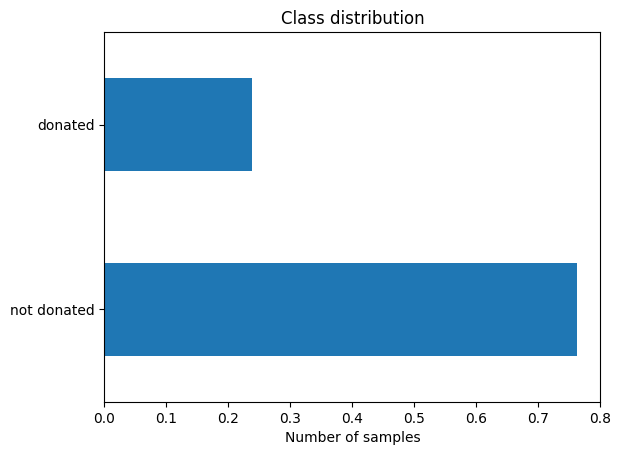

In [12]:
import matplotlib.pyplot as plt

target.value_counts(normalize=True).plot.barh()
plt.xlabel("Number of samples")
_ = plt.title("Class distribution")

We see that the target is discrete and contains two categories: whether a person "donated" or "not donated" his/her blood. Thus the task to be solved is a classification problem. We should note that the class counts of these two classes is different.

In [24]:
target.value_counts()

not donated    570
donated        178
Name: Class, dtype: int64

In [26]:
target.value_counts(normalize=True)

not donated    0.762032
donated        0.237968
Name: Class, dtype: float64

Indeed, ~76% of the samples belong to the class "not donated". It is rather important: a classifier that would predict always this "not donated" class would achieve an accuracy of 76% of good classification without using any information from the data itself. This issue is known as class imbalance. One should take care about the generalization performance metric used to evaluate a model as well as the predictive model chosen itself.  
  

Now, let’s have a naive analysis to see if there is a link between features and the target using a pair plot representation.

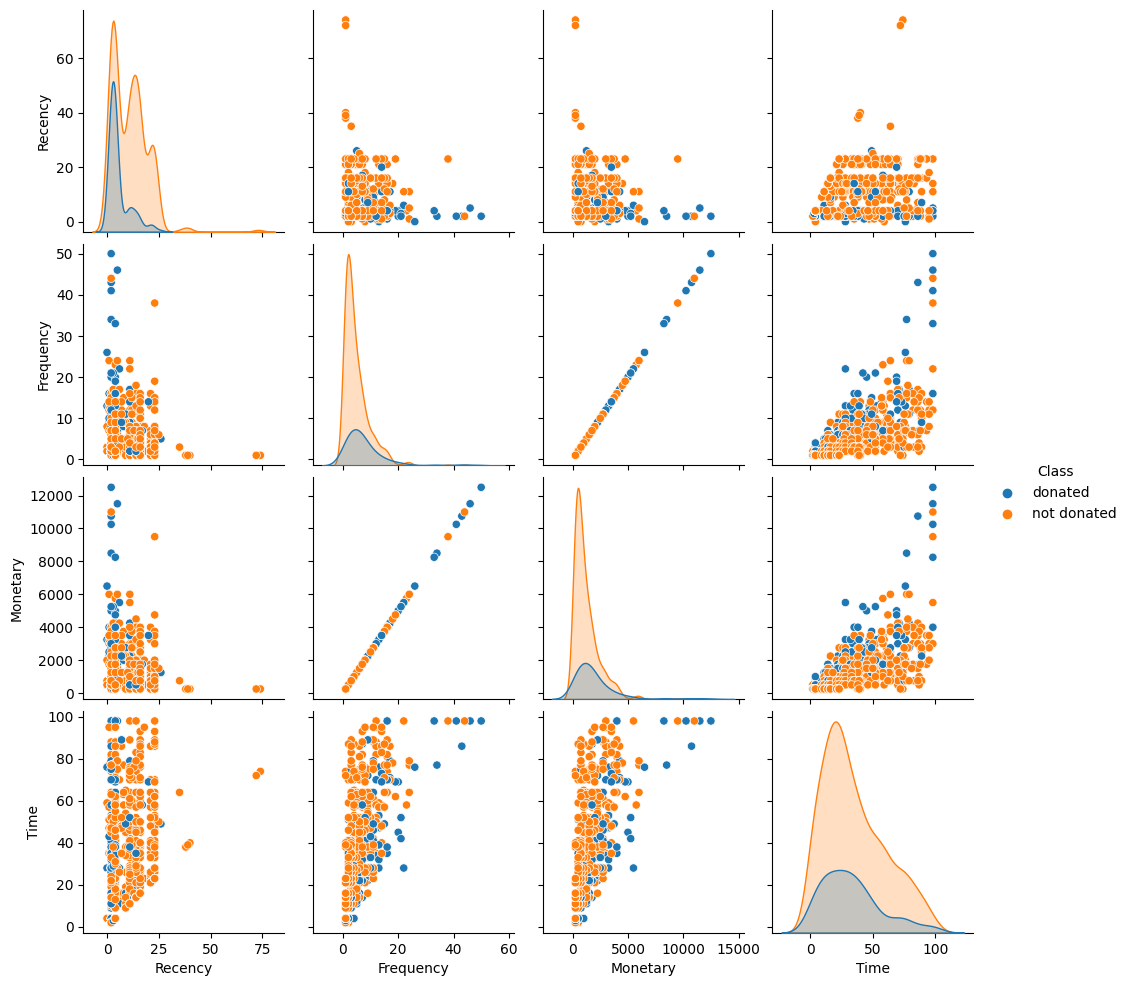

In [14]:
import seaborn as sns

_ = sns.pairplot(blood_transfusion, hue="Class")

Looking at the diagonal plots, we don’t see any feature that individually could help at separating the two classes. When looking at a pair of feature, we don’t see any striking combinations as well. However, we can note that the "Monetary" and "Frequency" features are perfectly correlated: all the data points are aligned on a diagonal.  
  
As a conclusion, this dataset would be a challenging dataset: it suffer from class imbalance, correlated features and thus very few features will be available to learn a model, and none of the feature combinations were found to help at predicting.

### Classification

Machine learning models rely on optimizing an objective function, by seeking its minimum or maximum. It is important to understand that this objective function is usually decoupled from the evaluation metric that we want to optimize in practice. The objective function serves as a proxy for the evaluation metric. Therefore, in the upcoming notebooks, we will present the different evaluation metrics used in machine learning.  
  
This notebook aims at giving an overview of the classification metrics that can be used to evaluate the predictive model generalization performance. We can recall that in a classification setting, the vector target is categorical rather than continuous.  


We could see that the vector target contains two classes corresponding to whether a subject gave blood. We will use a logistic regression classifier to predict this outcome.

To focus on the metrics presentation, we will only use a single split instead of cross-validation.

In [34]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data, target, shuffle=True, random_state=0, test_size=0.3
)

We will use a logistic regression classifier as a base model. We will train the model on the train set, and later use the test set to compute the different classification metric.

In [35]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(data_train, target_train)

LogisticRegression()

#### Classifier predictions

Before we go into details regarding the metrics, we will recall what type of predictions a classifier can provide.

For this reason, we will create a synthetic sample for a new potential donor: they donated blood twice in the past (1000 c.c. each time). The last time was 6 months ago, and the first time goes back to 20 months ago.

In [36]:
new_donor = pd.DataFrame(
    {
        "Recency": [6],
        "Frequency": [2],
        "Monetary": [1000],
        "Time": [20],
    }
)


We can get the class predicted by the classifier by calling the method predict.

In [37]:
classifier.predict(new_donor)

array(['not donated'], dtype=object)

With this information, our classifier predicts that this synthetic subject is more likely to not donate blood again.

However, we cannot check whether the prediction is correct (we do not know the true target value). That's the purpose of the testing set. First, we predict whether a subject will give blood with the help of the trained classifier.

In [38]:
target_predicted = classifier.predict(data_test)
target_predicted[:5]

array(['not donated', 'not donated', 'not donated', 'not donated',
       'donated'], dtype=object)

#### Accuracy as a baseline

Now that we have these predictions, we can compare them with the true predictions (sometimes called ground-truth) which we did not use until now.

In [39]:
target_test == target_predicted

258     True
521    False
14     False
31     False
505     True
       ...  
267     True
362     True
501     True
310     True
200     True
Name: Class, Length: 225, dtype: bool

In the comparison above, a True value means that the value predicted by our classifier is identical to the real value, while a False means that our classifier made a mistake. One way of getting an overall rate representing the generalization performance of our classifier would be to compute how many times our classifier was right and divide it by the number of samples in our set.

In [40]:
import numpy as np

np.mean(target_test == target_predicted)

0.7422222222222222

This measure is called the accuracy. Here, our classifier is 78% accurate at classifying if a subject will give blood. scikit-learn provides a function that computes this metric in the module sklearn.metrics.

In [41]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(target_test, target_predicted)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.742


LogisticRegression also has a method named score (part of the standard scikit-learn API), which computes the accuracy score.

In [42]:
classifier.score(data_test, target_test)

0.7422222222222222

#### Confusion matrix and derived metrics

The comparison that we did above and the accuracy that we calculated did not take into account the type of error our classifier was making. Accuracy is an aggregate of the errors made by the classifier. We may be interested in finer granularity - to know independently what the error is for each of the two following cases:

- we predicted that a person will give blood but they did not;  
- we predicted that a person will not give blood but they did.  

In [43]:
target_test.value_counts()

not donated    164
donated         61
Name: Class, dtype: int64

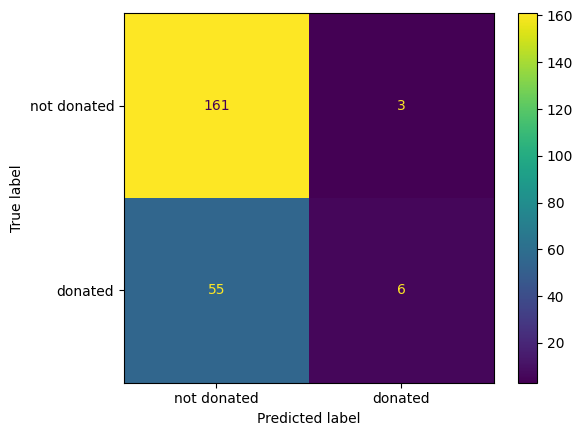

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay

_ = ConfusionMatrixDisplay.from_estimator(classifier, data_test, target_test, labels=['not donated', 'donated'])

The in-diagonal numbers are related to predictions that were correct while off-diagonal numbers are related to incorrect predictions (misclassifications). We now know the four types of correct and erroneous predictions:  
  
- the top left corner are true positives (TP) and corresponds to people who gave blood and were predicted as such by the classifier;
the bottom right corner are true negatives (TN) and correspond to people who did not give blood and were predicted as such by the classifier;  
- the top right corner are false negatives (FN) and correspond to people who gave blood but were predicted to not have given blood;  
- the bottom left corner are false positives (FP) and correspond to people who did not give blood but were predicted to have given blood.  
  
Once we have split this information, we can compute metrics to highlight the generalization performance of our classifier in a particular setting. For instance, we could be interested in the fraction of people who really gave blood when the classifier predicted so or the fraction of people predicted to have given blood out of the total population that actually did so.  
  
The former metric, known as the precision, is defined as TP / (TP + FP) and represents how likely the person actually gave blood when the classifier predicted that they did. The latter, known as the recall, defined as TP / (TP + FN) and assesses how well the classifier is able to correctly identify people who did give blood. We could, similarly to accuracy, manually compute these values, however scikit-learn provides functions to compute these statistics.

In [53]:
from sklearn.metrics import precision_score, recall_score
#  pos_label parameter is used to specify which class is considered the positive class when calculating the metrics.
precision = precision_score(target_test, target_predicted, pos_label="donated")
recall = recall_score(target_test, target_predicted, pos_label="donated")

print(f"Precision score: {precision:.3f}")
print(f"Recall score: {recall:.3f}")

Precision score: 0.667
Recall score: 0.098


These results are in line with what was seen in the confusion matrix. Looking at the right column, more than half of the "donated" predictions were correct, leading to a precision above 0.5. However, our classifier mislabeled a lot of people who gave blood as "not donated", leading to a very low recall of around 0.1.

#### The issue of class imbalance

At this stage, we could ask ourself a reasonable question. While the accuracy did not look bad (i.e. 74%), the recall score is relatively low (i.e. 10%).  
  
As we mentioned, precision and recall only focuses on samples predicted to be positive, while accuracy takes both into account. In addition, we did not look at the ratio of classes (labels). We could check this ratio in the training set.

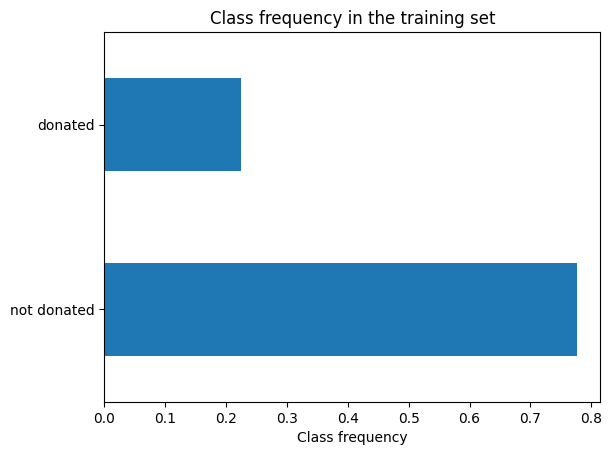

In [54]:
target_train.value_counts(normalize=True).plot.barh()
plt.xlabel("Class frequency")
_ = plt.title("Class frequency in the training set")

We observe that the positive class, 'donated', comprises only 24% of the samples. The good accuracy of our classifier is then linked to its ability to correctly predict the negative class 'not donated' which may or may not be relevant, depending on the application. We can illustrate the issue using a dummy classifier as a baseline.

DummyClassifier is a simple classification model provided by scikit-learn that serves as a baseline or reference model.   
  
**It is often used to compare the performance of more sophisticated machine learning models**.   
  
  The DummyClassifier class allows you to create a classifier that makes predictions using simple rules, such as predicting the most frequent class in the training set or generating random predictions.

In this example, the DummyClassifier is set to use the strategy of predicting the most frequent class in the training set.   
  
It's important to note that **the purpose of the DummyClassifier is not to provide a meaningful predictive model but rather to establish a baseline performance against which other models can be compared**.

In [55]:
from sklearn.dummy import DummyClassifier

# Create a DummyClassifier that predicts the most frequent class
dummy_classifier = DummyClassifier(strategy="most_frequent")
dummy_classifier.fit(data_train, target_train)
print(
    "Accuracy of the dummy classifier: "
    f"{dummy_classifier.score(data_test, target_test):.3f}"
)

Accuracy of the dummy classifier: 0.729


With the dummy classifier, which always predicts the negative class 'not donated', we obtain an accuracy score of 76%. Therefore, it means that this classifier, without learning anything from the data data, is capable of predicting as accurately as our logistic regression model.  
  
The problem illustrated above is also known as the class imbalance problem. When the classes are imbalanced, accuracy should not be used. In this case, one should either use the precision and recall as presented above or the balanced accuracy score instead of accuracy.

In [56]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy = balanced_accuracy_score(target_test, target_predicted)
print(f"Balanced accuracy: {balanced_accuracy:.3f}")

Balanced accuracy: 0.540


The balanced accuracy is equivalent to accuracy in the context of balanced classes. It is defined as the average recall obtained on each class.

#### Evaluation and different probability thresholds

All statistics that we presented up to now rely on classifier.predict which outputs the most likely label. We haven't made use of the probability associated with this prediction, which gives the confidence of the classifier in this prediction. By default, the prediction of a classifier corresponds to a threshold of 0.5 probability in a binary classification problem. We can quickly check this relationship with the classifier that we trained.

In [57]:
target_proba_predicted = pd.DataFrame(
    classifier.predict_proba(data_test), columns=classifier.classes_
)
target_proba_predicted[:5]

,donated,not donated
0,0.251929,0.748071
1,0.430283,0.569717
2,0.435317,0.564683
3,0.425531,0.574469
4,0.860349,0.139651


In [58]:
target_predicted = classifier.predict(data_test)
target_predicted[:5]

array(['not donated', 'not donated', 'not donated', 'not donated',
       'donated'], dtype=object)

Since probabilities sum to 1 we can get the class with the highest probability without using the threshold 0.5.

In [60]:
equivalence_pred_proba = (
    target_proba_predicted.idxmax(axis=1).to_numpy() == target_predicted
)
np.all(equivalence_pred_proba)

True

The default decision threshold (0.5) might not be the best threshold that leads to optimal generalization performance of our classifier. In this case, one can vary the decision threshold, and therefore the underlying prediction, and compute the same statistics presented earlier. Usually, the two metrics recall and precision are computed and plotted on a graph. Each metric plotted on a graph axis and each point on the graph corresponds to a specific decision threshold. Let's start by computing the precision-recall curve.

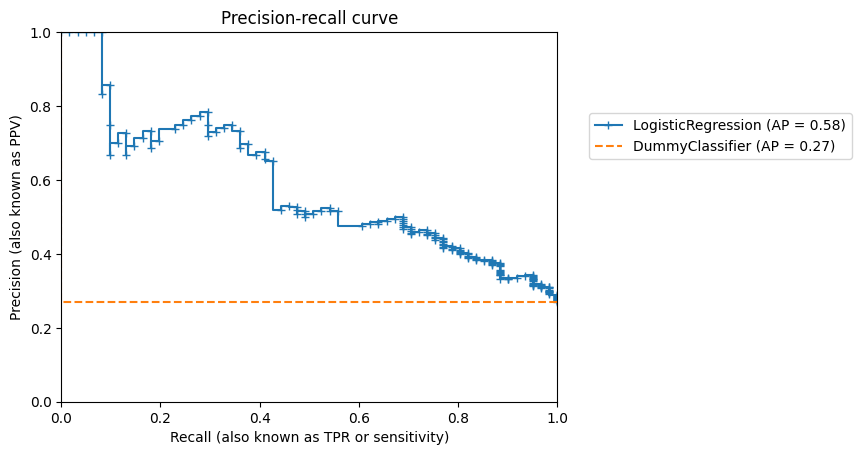

In [62]:

from sklearn.metrics import PrecisionRecallDisplay

disp = PrecisionRecallDisplay.from_estimator(
    classifier, data_test, target_test, pos_label="donated", marker="+"
)
disp = PrecisionRecallDisplay.from_estimator(
    dummy_classifier,
    data_test,
    target_test,
    pos_label="donated",
    color="tab:orange",
    linestyle="--",
    ax=disp.ax_,
)
plt.xlabel("Recall (also known as TPR or sensitivity)")
plt.ylabel("Precision (also known as PPV)")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
_ = disp.ax_.set_title("Precision-recall curve")

On this curve, each blue cross corresponds to a level of probability which we used as a decision threshold. We can see that, by varying this decision threshold, we get different precision vs. recall values.

A perfect classifier would have a precision of 1 for all recall values. A metric characterizing the curve is linked to the area under the curve (AUC) and is named average precision (AP). With an ideal classifier, the average precision would be 1.

Notice that the AP of a DummyClassifier, used as baseline to define the chance level, coincides with the number of samples in the positive class divided by the total number of samples (this number is called the prevalence of the positive class).

In [63]:
prevalence = target_test.value_counts()[1] / target_test.value_counts().sum()
print(f"Prevalence of the class 'donated': {prevalence:.2f}")

Prevalence of the class 'donated': 0.27


In [64]:
target_test.value_counts()

not donated    164
donated         61
Name: Class, dtype: int64


The precision and recall metric focuses on the positive class, however, one might be interested in the compromise between accurately discriminating the positive class and accurately discriminating the negative classes. The statistics used for this are sensitivity and specificity. Sensitivity is just another name for recall. However, specificity measures the proportion of correctly classified samples in the negative class defined as: TN / (TN + FP). Similar to the precision-recall curve, sensitivity and specificity are generally plotted as a curve called the Receiver Operating Characteristic (ROC) curve. Below is such a curve:

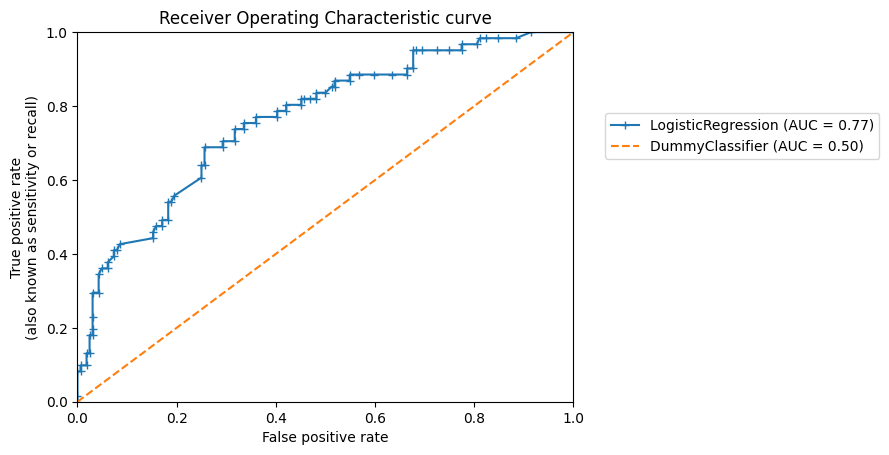

In [74]:
from sklearn.metrics import RocCurveDisplay

disp = RocCurveDisplay.from_estimator(
    classifier, data_test, target_test, pos_label="donated", marker="+"
)
disp = RocCurveDisplay.from_estimator(
    dummy_classifier,
    data_test,
    target_test,
    pos_label="donated",
    color="tab:orange",
    linestyle="--",
    ax=disp.ax_,
)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate\n(also known as sensitivity or recall)")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
_ = disp.ax_.set_title("Receiver Operating Characteristic curve")

This curve was built using the same principle as the precision-recall curve: we vary the probability threshold for determining "hard" prediction and compute the metrics. As with the precision-recall curve, we can compute the area under the ROC (ROC-AUC) to characterize the generalization performance of our classifier. However, it is important to observe that the lower bound of the ROC-AUC is 0.5. Indeed, we show the generalization performance of a dummy classifier (the orange dashed line) to show that even the worst generalization performance obtained will be above this line.

#### Find optimal treshold

In [80]:
target_proba_predicted = pd.DataFrame(
    classifier.predict_proba(data_test), columns=classifier.classes_
)
target_proba_predicted[:5]

,donated,not donated
0,0.251929,0.748071
1,0.430283,0.569717
2,0.435317,0.564683
3,0.425531,0.574469
4,0.860349,0.139651


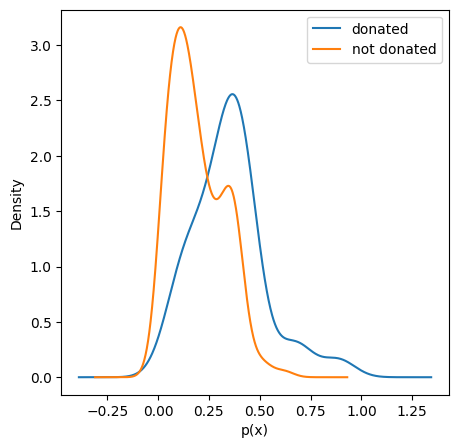

In [81]:
from matplotlib import pyplot
# performing predictions on the test dataset
yhat = classifier.predict_proba(data_test)[:,0] # donated column


# link the prediction to the label values
df_labels = pd.DataFrame({'prediction': yhat,
                          'label': target_test})

fig, ax = plt.subplots(1,1, figsize = (5,5))
df_labels[df_labels['label']=='donated']['prediction'].plot.kde(label='donated')
df_labels[df_labels['label']=='not donated']['prediction'].plot.kde(label='not donated')
pyplot.xlabel('p(x)')
pyplot.legend()

### Dealing with imbalanced data

https://towardsdatascience.com/how-to-deal-with-imbalanced-data-34ab7db9b100